In [1]:
require 'MulticlassLogisticCriterion'
require 'DataLoader'
eval_utils = require 'eval_utils'
cjson = require 'cjson'

n02970849/n02970849_11973	


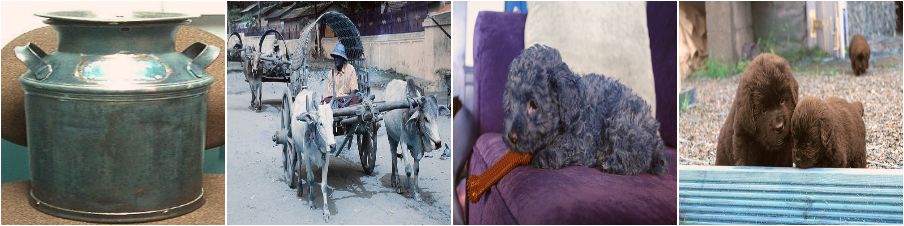

milk can	
---	
cart	
---	
dog	
---	
dog	
---	
4	


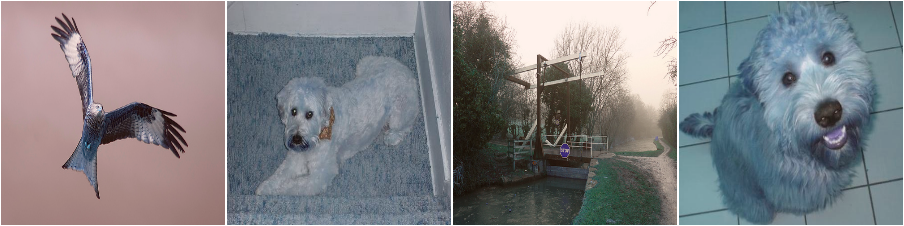

bird	
---	
dog	
---	
---	
dog	
---	
3	


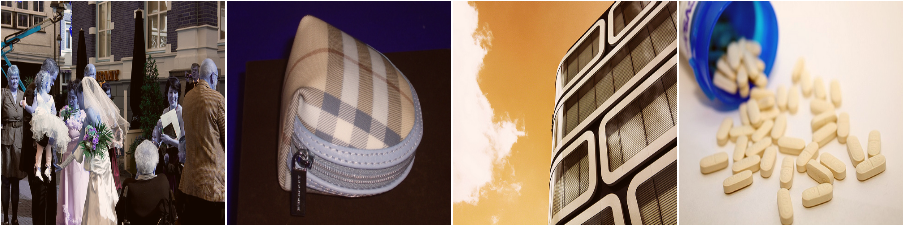

chair	
---	
purse	
---	
---	
---	
2	


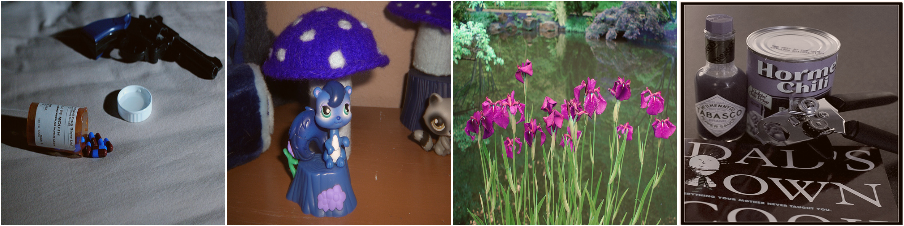

---	
---	
---	
---	
0	


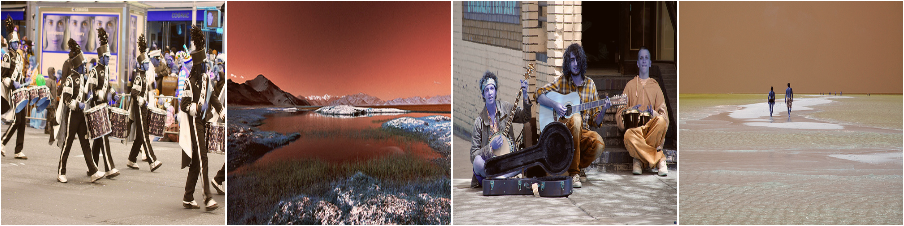

---	
---	
banjo	


person	


---	


---	
2	


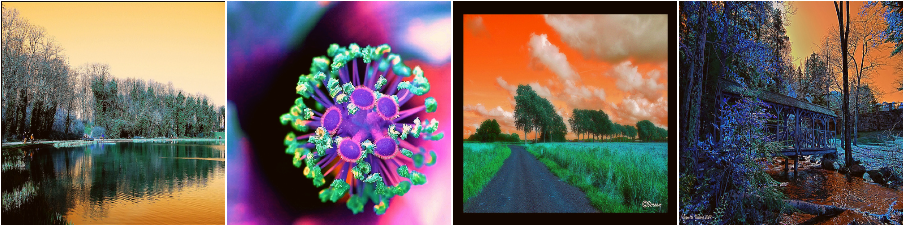

---	


---	


---	


---	
0	


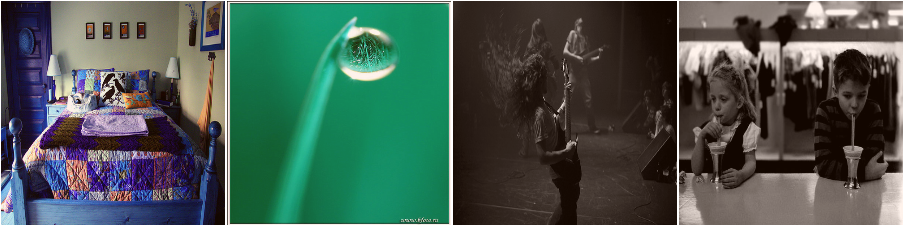

---	


---	


---	


---	
0	


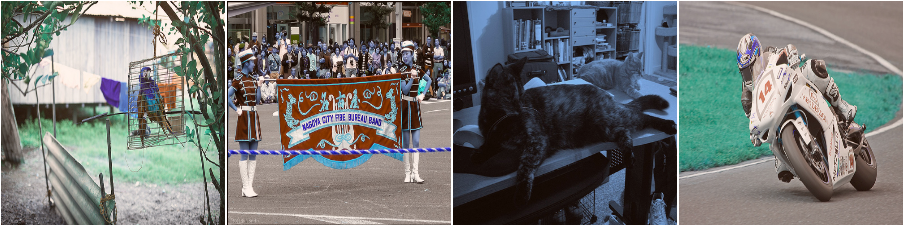

---	


---	


domestic cat	


---	


helmet	


---	
2	


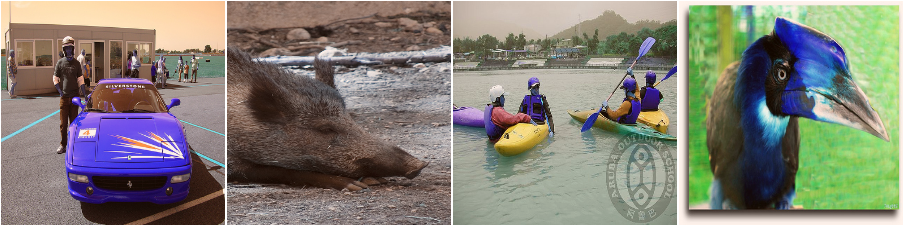

helmet	


---	


swine	
---	


person	


watercraft	
---	
bird	


---	
5	


bathing cap	
person	
---	
bathing cap	


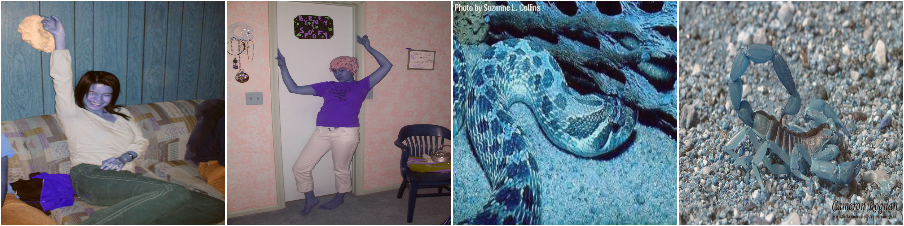

person	
---	
snake	
---	
scorpion	
---	
6	


In [2]:
local loader = DataLoader{
                 json_file='data/ilsvrc14-det.json',
                 h5_file='data/ilsvrc14-det.h5',
                 batch_size=4
               }

for k, v in pairs(loader.json_dicts.det_id_to_name) do
  -- print(k, type(k))
end
print(loader.json_dicts.idx_to_image_id['1'])

for t = 1, 10 do
  local images, labels = loader:getBatch('train')
  itorch.image(images)
  for i = 1, labels:size(1) do
    for j = 1, labels:size(2) do
      if labels[{i, j}] == 1 then
        local k = string.format('%d', j)
        print(loader.json_dicts.det_id_to_name[k])
      end
    end
    print('---')
  end
  print(labels:sum())
end

In [7]:
x = torch.randn(10, 5)
mask = torch.gt(torch.randn(10, 5), 0.25)
_, idx = x:max(2)

print(x)
print(mask)
print(idx)
print(mask:gather(2, idx))

-0.0884  0.1830 -0.3518  1.2093 -0.9734
 1.4438  0.5320  0.1408 -0.1282 -1.5096
 0.1162  0.2006 -0.6319 -0.0322 -1.1961
-1.1691 -0.2918  0.6998 -0.6615  2.0297
-0.6482 -1.2212  0.3052  0.6154  0.2339
 0.5248 -0.2739  0.2094 -0.0910 -0.5903
 0.1049  0.0840 -0.7725  1.7522 -0.8759
 1.4671  0.3028  0.2090  0.5414 -1.3015
 0.1054 -0.8859 -0.8795 -1.2984 -0.5059
-1.2452  0.1715  0.7941  0.4046 -1.6409
[torch.DoubleTensor of size 10x5]

 0  1  0  0  1
 0  0  0  0  0
 0  0  1  0  0
 1  0  1  0  0
 0  0  1  1  0
 0  1  0  1  0
 0  1  1  0  0
 0  0  1  0  0
 0  1  0  0  0
 1  1  0  0  1
[torch.ByteTensor of size 10x5]

 4
 1
 2
 5
 4
 1
 4
 1
 1
 3
[torch.LongTensor of size 10x1]

 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
[torch.ByteTensor of size 10x1]



In [21]:
local crit = nn.MulticlassLogisticCriterion()
local scores = torch.randn(10, 5)
local labels = torch.gt(torch.randn(10, 5), 0.25)
print(scores)
print(labels)
local loss = crit:forward(scores, labels)
print(loss)
local dscores = crit:backward(scores, labels)
print(dscores)
scores:add(-10, dscores)
loss = crit:forward(scores, labels)
print(loss)

-0.7450  0.3191 -1.4520  0.8152  0.5652
 0.4165 -0.2087  1.1817  0.4402  0.5859
-0.8272 -1.0092 -0.3552  1.2126  1.1446
 0.5466 -0.3376  1.7765  0.3646  1.4505
 0.1486 -0.9032  1.4836  0.5664  1.4708
 0.9264  0.7236 -0.8180  0.9761 -1.3185
-0.9261  0.5185 -0.2284 -1.0509  0.4572
-0.8019  1.1558 -0.2443 -1.2321 -0.6109
 0.7874 -0.7194 -1.0814  0.5625  1.5151
 0.9196  0.9379 -1.4587 -0.0584  0.5934
[torch.DoubleTensor of size 10x5]

 0  1  0  0  0
 1  0  0  0  1
 1  0  0  0  0
 0  0  1  1  0
 1  1  0  0  1
 1  1  0  0  0
 0  0  1  0  1
 1  1  1  0  1
 1  0  0  0  1
 0  0  1  0  0
[torch.ByteTensor of size 10x5]



0.76289773774977	
0.01 *
  0.6438 -0.8418  0.3794  1.3864  1.2753
 -0.7947  0.8960  1.5305  1.2166 -0.7151
 -1.3915  0.5343  0.8243  1.5415  1.5171
  1.2667  0.8328 -0.2895 -0.8197  1.6201
 -0.9258 -1.4232  1.6302  1.2759 -0.3737
 -0.5673 -0.6532  0.6124  1.4527  0.4221
  0.5674  1.2536 -1.1137  0.5181 -0.7753
 -1.3807 -0.4789 -1.1216  0.4516 -1.2963
 -0.6255  0.6551  0.5065  1.2741 -0.3604
  1.4299  1.4373 -1.6227  0.9708  1.2883
[torch.DoubleTensor of size 10x5]

0.7080544320863	


In [25]:
scores = torch.Tensor(3, 4)
labels = torch.ByteTensor(3, 4)

scores[1] = torch.Tensor{0.1, 0.2, 0.3, 0.4}
labels[1] = torch.ByteTensor{0, 0, 0, 1}

scores[2] = torch.Tensor{0.1, 0.5, 0.6, 0.4}
labels[2] = torch.ByteTensor{0, 1, 0, 0}

scores[3] = torch.Tensor{0.1, 0.2, 0.3, 0.04}
labels[3] = torch.ByteTensor{1, 0, 0, 0}

local stats = eval_utils.multiclass_eval(scores, labels)
print(stats)

{
  recall_at_1 : 0.33333333333333
}
